In [2]:
import xarray as xr
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [3]:
import pandas as pd
import numpy as np

# Define a function to extract temporal features
def extract_temporal_features(data):
    data['year'] = data['time'].dt.year
    data['month'] = data['time'].dt.month
    data['day'] = data['time'].dt.day
    data['day_of_week'] = data['time'].dt.dayofweek
    data['hour'] = data['time'].dt.hour
    return data

# Apply the function to each dataset
data_temp = extract_temporal_features(data_temp)
data_tmax = extract_temporal_features(data_tmax)
data_tmin = extract_temporal_features(data_tmin)
data_rain = extract_temporal_features(data_rain)
data_hurs = extract_temporal_features(data_hurs)
data_sun = extract_temporal_features(data_sun)
data_frost = extract_temporal_features(data_frost)
data_psl = extract_temporal_features(data_psl)
data_wind = extract_temporal_features(data_wind)


In [4]:
# Printing out temporal features for data_temp DataFrame
print("Temporal features for data_temp:")
print(data_temp[['year', 'month', 'day', 'day_of_week', 'hour']].to_dataframe())

# Printing out temporal features for data_tmax DataFrame
print("Temporal features for data_tmax:")
print(data_tmax[['year', 'month', 'day', 'day_of_week', 'hour']].to_dataframe())

# Printing out temporal features for data_tmin DataFrame
print("Temporal features for data_tmin:")
print(data_tmin[['year', 'month', 'day', 'day_of_week', 'hour']].to_dataframe())



Temporal features for data_temp:
            year  month  day  day_of_week  hour  month_number  season_year
time                                                                      
1884-01-16  1884      1   16            2     0             1         1884
1884-02-16  1884      2   16            5     0             2         1884
1884-03-16  1884      3   16            6     0             3         1884
1884-04-16  1884      4   16            2     0             4         1884
1884-05-16  1884      5   16            4     0             5         1884
...          ...    ...  ...          ...   ...           ...          ...
2022-08-16  2022      8   16            1     0             8         2022
2022-09-16  2022      9   16            4     0             9         2022
2022-10-16  2022     10   16            6     0            10         2022
2022-11-16  2022     11   16            2     0            11         2022
2022-12-16  2022     12   16            4     0            12      

In [5]:
from sklearn.preprocessing import MinMaxScaler

projection_x_coordinate = np.array(data_temp['projection_x_coordinate'])
projection_y_coordinate = np.array(data_temp['projection_y_coordinate'])

scaler = MinMaxScaler()

# Normalize spatial coordinates
pyc = scaler.fit_transform(projection_y_coordinate.reshape(-1, 1))
pxc = scaler.fit_transform(projection_x_coordinate.reshape(-1, 1))


In [6]:
rain = np.array(data_rain['rainfall'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
sun = np.array(data_sun['sun'])
frost = np.array(data_frost['groundfrost'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

In [7]:
from sklearn.preprocessing import OneHotEncoder
month = np.array(data_temp['month'])
day = np.array(data_temp['day'])
year = np.array(data_temp['year'])

# Encode categorical time features using one-hot encoding
encoder = OneHotEncoder()
month_encoded = encoder.fit_transform(month.reshape(-1, 1)).toarray()
day_encoded = encoder.fit_transform(day.reshape(-1, 1)).toarray()
year_encoded = encoder.fit_transform(year.reshape(-1, 1)).toarray()

# Concatenate encoded time features with other features, if any
time_features = np.concatenate((month_encoded, day_encoded, year_encoded), axis=1)

In [8]:
time_features.shape

(1668, 152)

In [9]:
temp.shape

(1668, 112, 82)

In [10]:
month_sin = np.sin(2 * np.pi * month / 12)
month_cos = np.cos(2 * np.pi * month / 12)

# Concatenate cyclical features with other time features
cyclical_time_features = np.concatenate((month_sin.reshape(-1, 1), month_cos.reshape(-1, 1), day_encoded, year_encoded), axis=1)

In [11]:
cyclical_time_features


array([[ 5.00000000e-01,  8.66025404e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.66025404e-01,  5.00000000e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  6.12323400e-17,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.66025404e-01,  5.00000000e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-5.00000000e-01,  8.66025404e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-2.44929360e-16,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [12]:
pyc.shape

(112, 1)

In [13]:
pxc.shape

(82, 1)

In [14]:
min_length = len(wind)
rain = rain[:min_length]
hurs = hurs[:min_length]
temp = temp[:min_length]
temp_max = temp_max[:min_length]
temp_min = temp_min[:min_length]
sun = sun[:min_length]
frost = frost[:min_length]
wind = wind[:min_length]
psl = psl[:min_length]

In [16]:
import numpy as np
import pandas as pd

# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

# Assuming cyclical_time_features is a NumPy array with the same number of rows as df
df = pd.concat([df, pd.DataFrame(cyclical_time_features)], axis=1)


In [17]:
pxc_flat.shape

(5951232,)

In [18]:
# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(pyc_flat)  # Assuming pyc_flat and pxc_flat have the same length
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame
df['Year'] = years_repeated[:len(df)]


In [19]:
df

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,...,133,134,135,136,137,138,139,140,141,Year
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1969
1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970
2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1971
3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1972
4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951227,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
5951228,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
5951229,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
5951230,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [20]:
nan_cells = []
for index, row in df.iterrows():
    if row[['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']].isnull().all():
        nan_cells.append((row['projection_y_coordinate'], row['projection_x_coordinate']))

# Print the number of grid cells with all NaN values
print("Number of grid cells with all NaN values:", len(nan_cells))

KeyboardInterrupt: 

In [20]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df[df['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df = df.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame
df.drop(indices_of_interest, inplace=True)


In [21]:
# Drop rows with NaN values introduced by lagging
df_no_nan = df.dropna()

# Target variable (future temperatures over the entire grid)
y = df_no_nan['Temp'].values

# Features
X = df_no_nan.drop(['Temp'], axis=1).values

In [22]:
df_no_nan

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,...,133,134,135,136,137,138,139,140,141,Year
852,0.009009,0.0,126.147451,90.974516,7.942743,9.483172,6.529507,52.679074,4.993733,1011.305341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
932,0.009009,0.0,135.781950,89.126366,8.190250,9.772596,6.601715,53.206094,8.241496,1011.004080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1983
933,0.009009,0.0,136.153542,90.382016,7.702709,9.391944,6.083515,51.006741,8.111889,1011.190085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984
934,0.009009,0.0,146.281093,92.148919,7.530887,9.284392,5.920506,50.349402,10.444545,1011.223684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985
1015,0.009009,0.0,131.803960,89.188032,7.908033,9.432582,6.403731,49.513828,7.012561,1011.116773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,0.018018,0.0,98.923992,87.933272,5.422556,8.220789,2.712631,63.169404,18.895965,1012.433488,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1971
1623,0.018018,0.0,102.976128,87.770754,5.541594,8.322772,2.841157,64.227983,18.299654,1012.542908,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1972
1624,0.018018,0.0,95.491359,87.538081,5.661016,8.544236,2.944981,65.066940,18.531935,1012.586768,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1973
1625,0.018018,0.0,91.924888,87.242208,5.760976,8.581752,3.157288,64.380761,17.609708,1012.529486,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1974


Mean Squared Error: 0.007606916016778874
R-squared Value: 0.9753593161955625


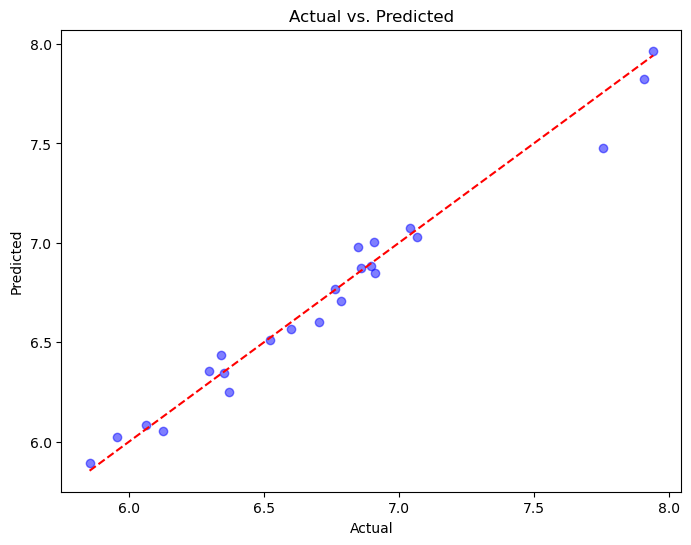

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
gb_regressor = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_depth=3)
gb_regressor.fit(X_train, y_train)


y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [24]:
# Drop rows with NaN values introduced by lagging
new_df_no_nan = new_df.dropna()

# Separate the temperature column before prediction
X_temp = new_df_no_nan['Temp'].values.reshape(-1, 1)
X_new = new_df_no_nan.drop(['Temp'], axis=1).values

In [25]:
# Assuming rf_model is your trained Random Forest model
future_predictions = gb_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[7.51890761 7.68694253 6.86464306 7.65559185 7.11105885 7.0953536
 6.53062455 6.80139061 6.71361712 5.5061064  6.9104343  6.70116468
 7.01479794 6.89208338 6.58391587 6.39376265 6.08987611 6.15706706
 6.28886566 6.2016108  5.92752221 5.97963078 6.00112742 6.25622058
 6.41472718 5.97637039]
(26,)


In [26]:
X_temp.shape

(26, 1)

In [27]:
import pandas as pd

# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df)

    Actual_Temp  Predicted_Temp
0      7.418031        7.518908
1      7.700478        7.686943
2      6.837510        6.864643
3      7.678704        7.655592
4      7.090093        7.111059
5      7.077178        7.095354
6      6.583887        6.530625
7      6.820895        6.801391
8      6.791171        6.713617
9      5.656997        5.506106
10     6.866317        6.910434
11     6.637544        6.701165
12     6.958141        7.014798
13     6.855071        6.892083
14     6.586501        6.583916
15     6.303038        6.393763
16     6.183184        6.089876
17     6.177347        6.157067
18     6.342243        6.288866
19     6.269618        6.201611
20     5.942268        5.927522
21     5.963757        5.979631
22     5.985249        6.001127
23     6.309076        6.256221
24     6.496433        6.414727
25     5.944510        5.976370


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")


R-squared: 0.9872976257165548
Mean Absolute Error: 0.047985401006467136
Mean Squared Error: 0.0035003555152823785


Text(0, 0.5, 'Residuals')

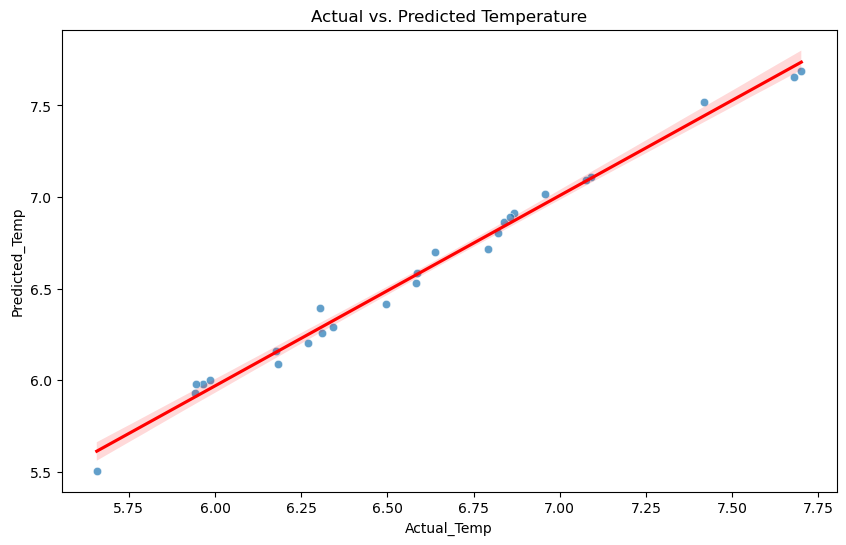

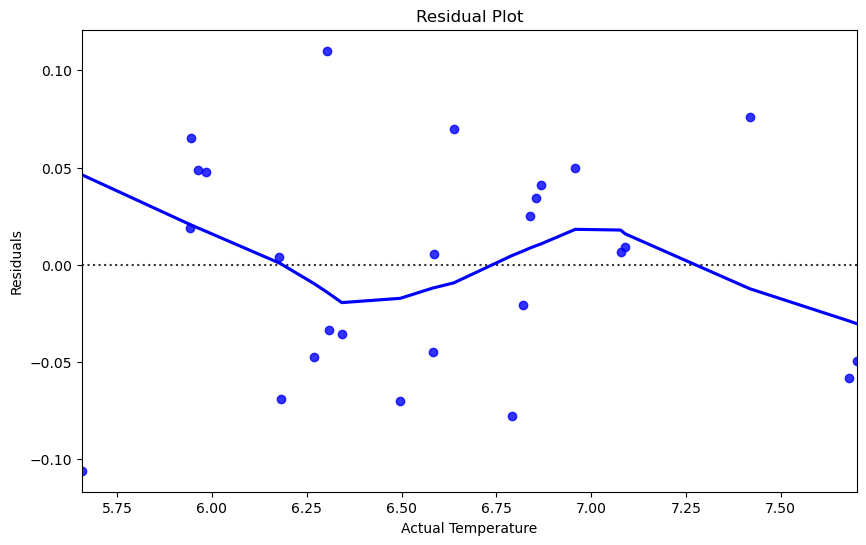

In [29]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Temp', y='Predicted_Temp', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Regression line
sns.regplot(x='Actual_Temp', y='Predicted_Temp', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual_Temp', y='Predicted_Temp', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Temperature')
plt.ylabel('Residuals')


## Different Technique

In [57]:
import numpy as np
import pandas as pd

# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [58]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [59]:
df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind
852,0.009009,0.0,126.147451,90.974516,7.942743,9.483172,6.529507,52.679074,4.993733,1011.305341,7.837565
932,0.009009,0.0,135.781950,89.126366,8.190250,9.772596,6.601715,53.206094,8.241496,1011.004080,6.831000
933,0.009009,0.0,136.153542,90.382016,7.702709,9.391944,6.083515,51.006741,8.111889,1011.190085,6.065469
934,0.009009,0.0,146.281093,92.148919,7.530887,9.284392,5.920506,50.349402,10.444545,1011.223684,6.494661
1015,0.009009,0.0,131.803960,89.188032,7.908033,9.432582,6.403731,49.513828,7.012561,1011.116773,6.079681
...,...,...,...,...,...,...,...,...,...,...,...
5950794,1.000000,1.0,142.087923,79.461483,3.691437,5.506234,1.923258,10.497998,15.228559,1001.843373,8.494136
5950876,1.000000,1.0,167.382607,79.888634,3.709721,5.437188,2.035055,9.893316,15.112403,1001.732963,9.363961
5950877,1.000000,1.0,175.431880,80.384491,3.909819,5.660394,2.415599,12.051018,14.321967,1001.773660,10.057385
5950959,1.000000,1.0,161.446328,81.476529,3.445058,5.425583,1.515693,9.586379,15.877283,1001.559028,8.303095


In [60]:
import numpy as np
import pandas as pd

# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


C:\Users\iarla\AppData\Local\Temp\ipykernel_13268\2662173307.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [62]:
df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,Year
852,0.009009,0.0,126.147451,90.974516,7.942743,9.483172,6.529507,52.679074,4.993733,1011.305341,7.837565,1969
932,0.009009,0.0,135.781950,89.126366,8.190250,9.772596,6.601715,53.206094,8.241496,1011.004080,6.831000,1970
933,0.009009,0.0,136.153542,90.382016,7.702709,9.391944,6.083515,51.006741,8.111889,1011.190085,6.065469,1971
934,0.009009,0.0,146.281093,92.148919,7.530887,9.284392,5.920506,50.349402,10.444545,1011.223684,6.494661,1972
1015,0.009009,0.0,131.803960,89.188032,7.908033,9.432582,6.403731,49.513828,7.012561,1011.116773,6.079681,1973
...,...,...,...,...,...,...,...,...,...,...,...,...
5950794,1.000000,1.0,142.087923,79.461483,3.691437,5.506234,1.923258,10.497998,15.228559,1001.843373,8.494136,1981
5950876,1.000000,1.0,167.382607,79.888634,3.709721,5.437188,2.035055,9.893316,15.112403,1001.732963,9.363961,1982
5950877,1.000000,1.0,175.431880,80.384491,3.909819,5.660394,2.415599,12.051018,14.321967,1001.773660,10.057385,1983
5950959,1.000000,1.0,161.446328,81.476529,3.445058,5.425583,1.515693,9.586379,15.877283,1001.559028,8.303095,1984


In [ ]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Filter rows based on the years of interest
rows_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

In [64]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)


In [65]:
new_df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,Year
1355,0.018018,0.0,75.122752,87.820079,7.066459,9.496004,4.652719,61.328209,15.754712,1011.626903,5.792738,2013
1358,0.018018,0.0,74.722797,88.151241,7.171069,9.752988,4.727571,68.660224,13.303446,1011.716412,6.466739,2014
1359,0.018018,0.0,76.758510,88.152515,6.388286,8.937728,3.852166,68.277069,15.631113,1011.721162,6.913290,2015
1360,0.018018,0.0,87.381053,88.056528,6.395669,8.943188,3.982191,69.733919,17.834980,1011.745675,6.015118,2016
1361,0.018018,0.0,86.084085,87.619765,6.753537,9.396187,4.133092,71.662597,17.885060,1011.804720,5.273851,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
5949309,0.981982,1.0,58.625933,91.611267,2.843987,5.741640,0.061295,28.193768,21.085514,1005.820466,4.238288,2018
5949382,0.981982,1.0,90.796143,83.109668,2.971155,4.839639,1.425592,22.561367,8.794880,1004.965121,6.312010,2019
5949383,0.981982,1.0,82.877643,83.474671,2.712619,4.854421,0.871979,20.168091,11.434160,1004.987608,5.407377,2020
5949386,0.981982,1.0,75.343349,83.641669,3.238767,5.734249,0.844590,20.177609,10.612270,1005.630589,5.545080,2021


In [66]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp'], axis=1).values

Mean Squared Error: 0.015952253967666863
R-squared Value: 0.9992184438707783


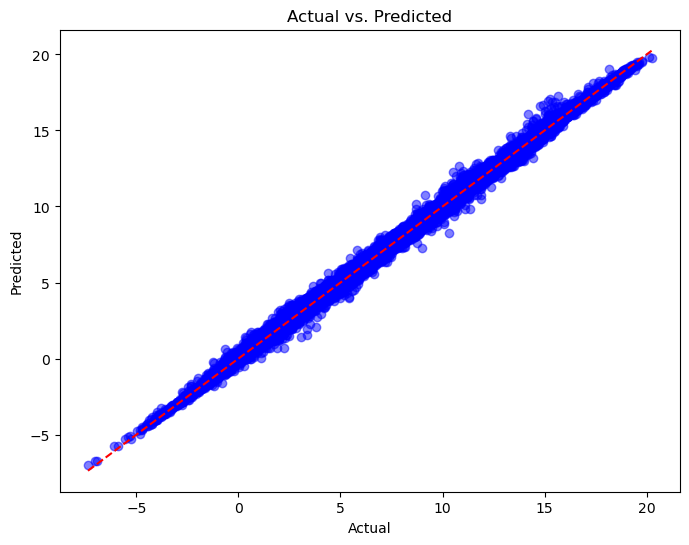

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
gb_regressor = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150, max_depth=3)
gb_regressor.fit(X_train, y_train)


y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [68]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = gb_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[7.04528249 7.13002333 6.36700431 ... 2.76171996 3.29588906 2.75988248]
(204610,)


In [69]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual_Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted_Temp': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual_Temp  Predicted_Temp
0          7.066459        7.045282
1          7.171069        7.130023
2          6.388286        6.367004
3          6.395669        6.422804
4          6.753537        6.705345
...             ...             ...
204605     2.843987        2.917443
204606     2.971155        3.132839
204607     2.712619        2.761720
204608     3.238767        3.295889
204609     2.817050        2.759882

[204610 rows x 2 columns]


In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual_Temp'], comparison_df['Predicted_Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.9991959945313466
Mean Absolute Error: 0.08717998821131061
Mean Squared Error: 0.016441165026557875


Text(0, 0.5, 'Residuals')

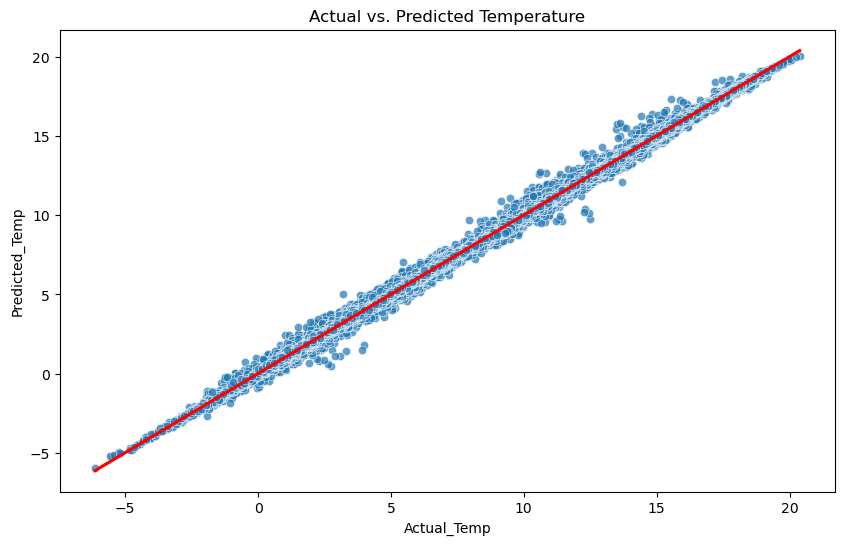

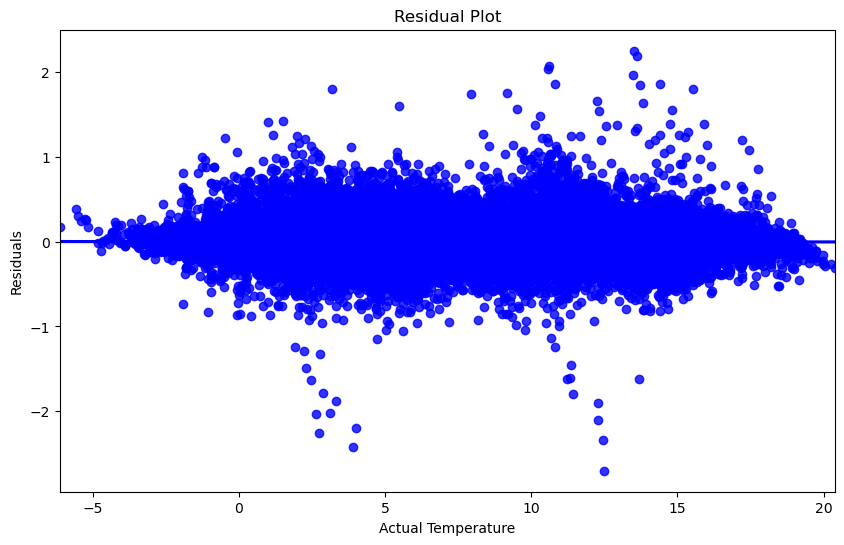

In [72]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Temp', y='Predicted_Temp', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Regression line
sns.regplot(x='Actual_Temp', y='Predicted_Temp', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual_Temp', y='Predicted_Temp', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Temperature')
plt.ylabel('Residuals')


## Humidity

In [38]:
import numpy as np
import pandas as pd

# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [39]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [40]:
df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind
852,0.009009,0.0,126.147451,90.974516,7.942743,9.483172,6.529507,52.679074,4.993733,1011.305341,7.837565
932,0.009009,0.0,135.781950,89.126366,8.190250,9.772596,6.601715,53.206094,8.241496,1011.004080,6.831000
933,0.009009,0.0,136.153542,90.382016,7.702709,9.391944,6.083515,51.006741,8.111889,1011.190085,6.065469
934,0.009009,0.0,146.281093,92.148919,7.530887,9.284392,5.920506,50.349402,10.444545,1011.223684,6.494661
1015,0.009009,0.0,131.803960,89.188032,7.908033,9.432582,6.403731,49.513828,7.012561,1011.116773,6.079681
...,...,...,...,...,...,...,...,...,...,...,...
5730378,1.000000,1.0,89.834557,80.136710,3.555690,5.442186,1.842882,5.520051,17.498647,1003.309152,8.494136
5730460,1.000000,1.0,100.803642,79.639673,3.655753,5.430446,1.957260,5.164032,17.024296,1003.418027,9.363961
5730461,1.000000,1.0,129.729265,79.700137,3.883003,5.762814,2.296544,5.137338,14.972704,1003.538650,10.057385
5730543,1.000000,1.0,119.823598,80.173045,3.467927,5.582704,1.382532,4.065008,15.742340,1003.549217,8.303095


In [41]:
import numpy as np
import pandas as pd

# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


C:\Users\iarla\AppData\Local\Temp\ipykernel_18536\2662173307.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [42]:
df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,Year
852,0.009009,0.0,126.147451,90.974516,7.942743,9.483172,6.529507,52.679074,4.993733,1011.305341,7.837565,1969
932,0.009009,0.0,135.781950,89.126366,8.190250,9.772596,6.601715,53.206094,8.241496,1011.004080,6.831000,1970
933,0.009009,0.0,136.153542,90.382016,7.702709,9.391944,6.083515,51.006741,8.111889,1011.190085,6.065469,1971
934,0.009009,0.0,146.281093,92.148919,7.530887,9.284392,5.920506,50.349402,10.444545,1011.223684,6.494661,1972
1015,0.009009,0.0,131.803960,89.188032,7.908033,9.432582,6.403731,49.513828,7.012561,1011.116773,6.079681,1973
...,...,...,...,...,...,...,...,...,...,...,...,...
5730378,1.000000,1.0,89.834557,80.136710,3.555690,5.442186,1.842882,5.520051,17.498647,1003.309152,8.494136,1999
5730460,1.000000,1.0,100.803642,79.639673,3.655753,5.430446,1.957260,5.164032,17.024296,1003.418027,9.363961,2000
5730461,1.000000,1.0,129.729265,79.700137,3.883003,5.762814,2.296544,5.137338,14.972704,1003.538650,10.057385,2001
5730543,1.000000,1.0,119.823598,80.173045,3.467927,5.582704,1.382532,4.065008,15.742340,1003.549217,8.303095,2002


In [43]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Filter rows based on the years of interest
rows_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

Data available for the specified years.


In [44]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)


In [45]:
new_df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,Year
1355,0.018018,0.0,75.122752,87.820079,7.066459,9.496004,4.652719,61.328209,15.754712,1011.626903,5.792738,2013
1358,0.018018,0.0,74.722797,88.151241,7.171069,9.752988,4.727571,68.660224,13.303446,1011.716412,6.466739,2014
1359,0.018018,0.0,76.758510,88.152515,6.388286,8.937728,3.852166,68.277069,15.631113,1011.721162,6.913290,2015
1360,0.018018,0.0,87.381053,88.056528,6.395669,8.943188,3.982191,69.733919,17.834980,1011.745675,6.015118,2016
1361,0.018018,0.0,86.084085,87.619765,6.753537,9.396187,4.133092,71.662597,17.885060,1011.804720,5.273851,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
5728805,0.972973,1.0,132.143257,85.974063,0.594024,3.746173,-2.577106,21.598101,20.529803,1001.810324,4.232321,2018
5728806,0.972973,1.0,103.455055,85.908417,0.946153,3.970158,-2.074646,21.697694,20.159155,1001.857010,3.978473,2019
5728807,0.972973,1.0,101.995621,86.015630,0.598216,3.442861,-2.149985,23.780932,20.012191,1001.844093,5.350091,2020
5728808,0.972973,1.0,97.184674,86.416319,0.608189,3.498369,-2.145115,23.435724,20.281502,1001.802138,5.274995,2021


In [46]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Hurs'].values

# Features
X = df_filtered.drop(['Hurs'], axis=1).values

Mean Squared Error: 8.305232668952897
R-squared Value: 0.5935082025094398


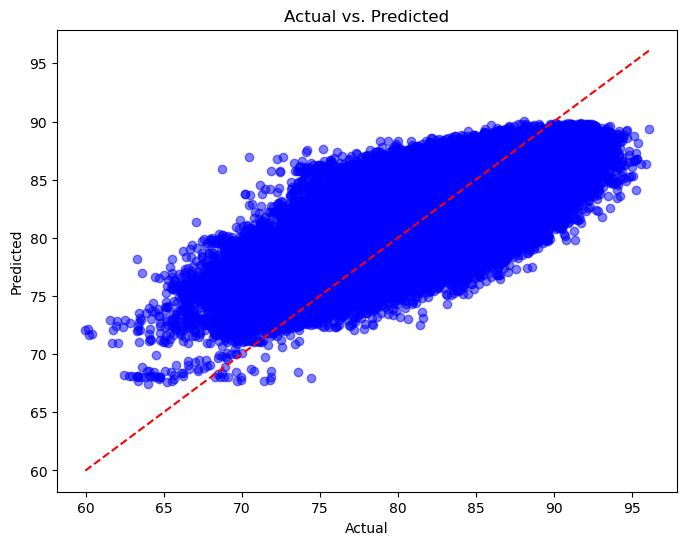

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
gb_regressor = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150, max_depth=3)
gb_regressor.fit(X_train, y_train)


y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [48]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Hurs'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Hurs'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = gb_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[86.30021787 85.77734676 85.8115582  ... 86.66744361 86.89658063
 87.30125261]
(197020,)


In [49]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Hurs': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Hurs': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual Hurs  Predicted Hurs
0         87.820079       86.300218
1         88.151241       85.777347
2         88.152515       85.811558
3         88.056528       85.856205
4         87.619765       85.866738
...             ...             ...
197015    85.974063       87.642229
197016    85.908417       87.551565
197017    86.015630       86.667444
197018    86.416319       86.896581
197019    87.000606       87.301253

[197020 rows x 2 columns]


In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Hurs'], comparison_df['Predicted Hurs'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Hurs'], comparison_df['Predicted Hurs'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Hurs'], comparison_df['Predicted Hurs'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.5943092129490444
Mean Absolute Error: 2.2717691805813196
Mean Squared Error: 8.318290256380301


Text(0, 0.5, 'Residuals')

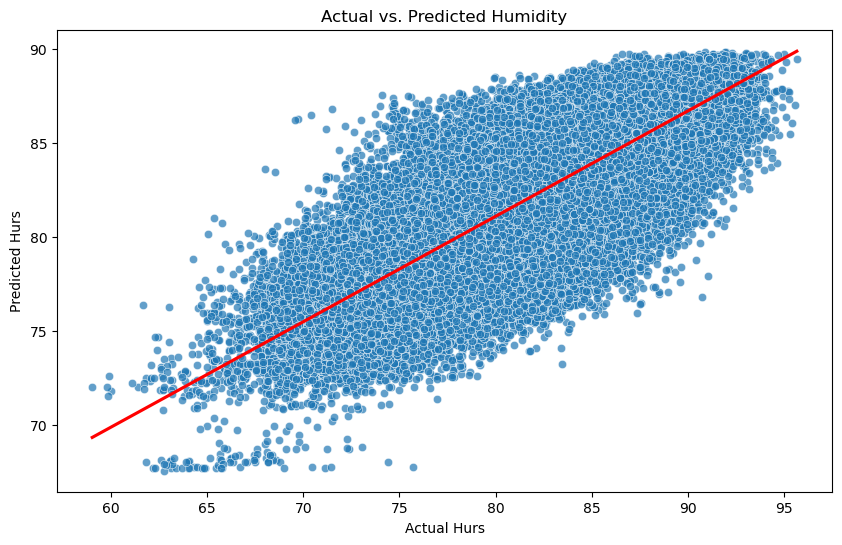

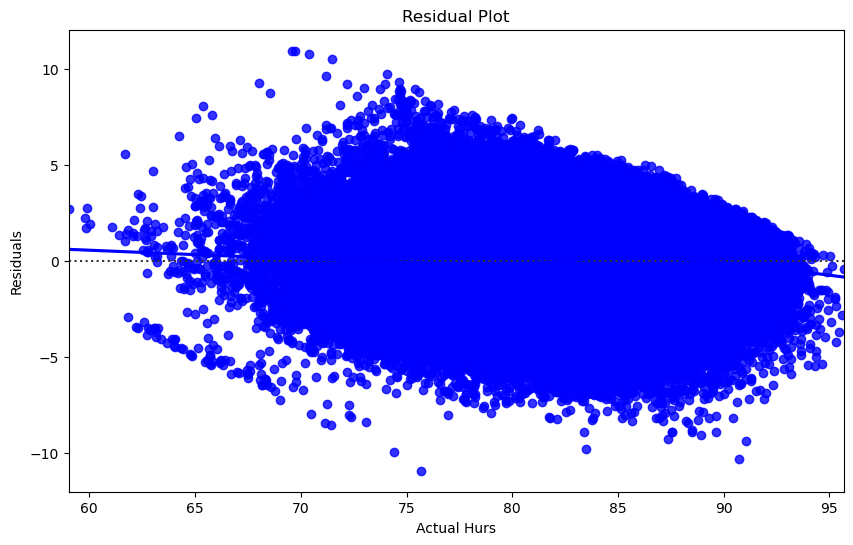

In [53]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Hurs', y='Predicted Hurs', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Humidity')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')

# Regression line
sns.regplot(x='Actual Hurs', y='Predicted Hurs', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Hurs', y='Predicted Hurs', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Hurs')
plt.ylabel('Residuals')

## Rainfall

In [15]:
import numpy as np
import pandas as pd

# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [16]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [17]:
df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind
852,0.009009,0.0,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565
932,0.009009,0.0,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000
933,0.009009,0.0,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469
934,0.009009,0.0,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661
1015,0.009009,0.0,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681
...,...,...,...,...,...,...,...,...,...,...,...
5950794,1.000000,1.0,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.136543,8.494136
5950876,1.000000,1.0,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.014567,9.363961
5950877,1.000000,1.0,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.246414,10.057385
5950959,1.000000,1.0,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.119192,8.303095


In [18]:
import numpy as np
import pandas as pd

# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


C:\Users\iarla\AppData\Local\Temp\ipykernel_7572\2662173307.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [19]:
df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,Year
852,0.009009,0.0,126.147451,90.974516,7.942743,6.529507,9.483172,52.679074,4.993733,1011.305341,7.837565,1969
932,0.009009,0.0,135.781950,89.126366,8.190250,6.601715,9.772596,53.206094,8.241496,1011.004080,6.831000,1970
933,0.009009,0.0,136.153542,90.382016,7.702709,6.083515,9.391944,51.006741,8.111889,1011.190085,6.065469,1971
934,0.009009,0.0,146.281093,92.148919,7.530887,5.920506,9.284392,50.349402,10.444545,1011.223684,6.494661,1972
1015,0.009009,0.0,131.803960,89.188032,7.908033,6.403731,9.432582,49.513828,7.012561,1011.116773,6.079681,1973
...,...,...,...,...,...,...,...,...,...,...,...,...
5950794,1.000000,1.0,142.087923,79.461483,3.691437,1.923258,5.506234,10.497998,15.228559,1001.136543,8.494136,1981
5950876,1.000000,1.0,167.382607,79.888634,3.709721,2.035055,5.437188,9.893316,15.112403,1001.014567,9.363961,1982
5950877,1.000000,1.0,175.431880,80.384491,3.909819,2.415599,5.660394,12.051018,14.321967,1001.246414,10.057385,1983
5950959,1.000000,1.0,161.446328,81.476529,3.445058,1.515693,5.425583,9.586379,15.877283,1001.119192,8.303095,1984


In [20]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Filter rows based on the years of interest
rows_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

Data available for the specified years.


In [21]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)

In [22]:
new_df_filtered

,projection_y_coordinate,projection_x_coordinate,Rain,Hurs,Temp,Temp_Min,Temp_Max,Sun,Frost,Psl,Wind,Year
1355,0.018018,0.0,75.122752,87.820079,7.066459,4.652719,9.496004,61.328209,15.754712,1011.626903,5.792738,2013
1358,0.018018,0.0,74.722797,88.151241,7.171069,4.727571,9.752988,68.660224,13.303446,1011.716412,6.466739,2014
1359,0.018018,0.0,76.758510,88.152515,6.388286,3.852166,8.937728,68.277069,15.631113,1011.721162,6.913290,2015
1360,0.018018,0.0,87.381053,88.056528,6.395669,3.982191,8.943188,69.733919,17.834980,1011.745675,6.015118,2016
1361,0.018018,0.0,86.084085,87.619765,6.753537,4.133092,9.396187,71.662597,17.885060,1011.804720,5.273851,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
5949309,0.981982,1.0,58.625933,91.611267,2.843987,0.061295,5.741640,28.193768,21.085514,1002.251298,4.238288,2018
5949382,0.981982,1.0,90.796143,83.109668,2.971155,1.425592,4.839639,22.561367,8.794880,999.976356,6.312010,2019
5949383,0.981982,1.0,82.877643,83.474671,2.712619,0.871979,4.854421,20.168091,11.434160,1000.151695,5.407377,2020
5949386,0.981982,1.0,75.343349,83.641669,3.238767,0.844590,5.734249,20.177609,10.612270,1001.274131,5.545080,2021


In [23]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Rain'].values

# Features
X = df_filtered.drop(['Rain'], axis=1).values

Mean Squared Error: 2674.1670920903885
R-squared Value: 0.2612363211909191


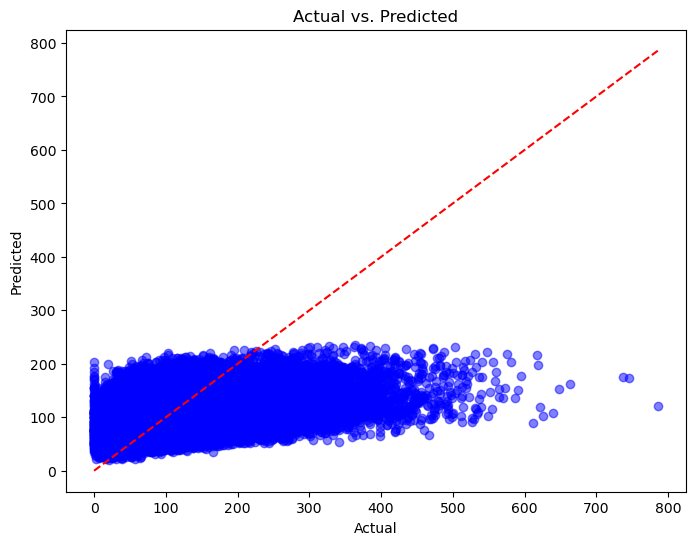

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regression Model
gb_regressor = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150, max_depth=3)
gb_regressor.fit(X_train, y_train)


y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [25]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Rain'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Rain'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = gb_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[ 97.3989278  101.78831473  92.99906592 ... 176.18189883 169.01712986
 165.32485477]
(204610,)


In [26]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Rain': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Rain': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual Rain  Predicted Rain
0         75.122752       97.398928
1         74.722797      101.788315
2         76.758510       92.999066
3         87.381053       96.201916
4         86.084085       89.537945
...             ...             ...
204605    58.625933       85.616569
204606    90.796143      181.311811
204607    82.877643      176.181899
204608    75.343349      169.017130
204609    89.424669      165.324855

[204610 rows x 2 columns]


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.25942434136456527
Mean Absolute Error: 37.72185969549134
Mean Squared Error: 2693.7211609403657


In [ ]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Rain')
plt.xlabel('Actual Rain')
plt.ylabel('Predicted Rain')

# Regression line
sns.regplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Rain')
plt.ylabel('Residuals')

KeyboardInterrupt: 

Exception ignored in: 'statsmodels.nonparametric._smoothers_lowess.calculate_weights'
Traceback (most recent call last):
  File "C:\Users\iarla\miniconda3\envs\jupyter-env\Lib\site-packages\numpy\core\fromnumeric.py", line 2172, in _sum_dispatcher
    def _sum_dispatcher(a, axis=None, dtype=None, out=None, keepdims=None,
    
KeyboardInterrupt: 
